In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [102]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [103]:
df_train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [104]:
df_test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [105]:
df_train.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

Now that I have got a general idea about your data set, it’s also a good idea to take a closer look at the data itself. With the help of the head() and tail() functions to check out the first and last lines of my DataFrame, respectively.

In [106]:
df_train.tail()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[5 rows x 81 columns]

In [107]:
# Get the overall concise summary of the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Lets check what are the numerical features in the df_train dataset

In [108]:
numeric_features = df_train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

numeric features head

In [109]:
numeric_features.head()

Id  MSSubClass  LotFrontage  LotArea  ...  MiscVal  MoSold  YrSold  SalePrice
0   1          60         65.0     8450  ...        0       2    2008     208500
1   2          20         80.0     9600  ...        0       5    2007     181500
2   3          60         68.0    11250  ...        0       9    2008     223500
3   4          70         60.0     9550  ...        0       2    2006     140000
4   5          60         84.0    14260  ...        0      12    2008     250000

[5 rows x 38 columns]

Now a general description of SalePrice

In [110]:
# Now, as we will be predicting 'SalePrice' lets see description of that column
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

For a regression problem, the most important thing to do is to understand the distribution
of your target. If a target ranges between 1 and 10, and after training our model we get a
mean absolute error of 5, we can tell that the error is large in this context.
However, the same error for a target that ranges between 500,000 and 1,000,000 is
negligible.

- If you have numeric type dataset and want to visualize in histogram
- then the seaborn histogram will help you. For this seaborn distplot function responsible to plot it.
- On y-axis give the numeric dataset
- On x-axis gives bins. It means distribute given dataset in a particular range and show in bars
- e.g. bins= 18 and bins = 40

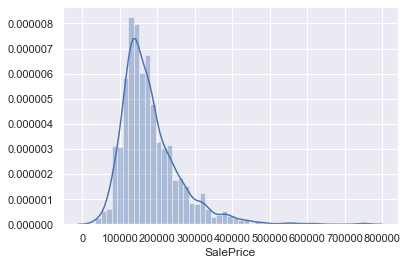

In [111]:
sns.distplot(df_train['SalePrice'])

From the above distplot, the 'SalePrice' is dense between 100k and 250k, but there are larger outliers on the right side, i.e the expensive price range.

Now, let’s have a look at the greater living area (square feet) against the sale price:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


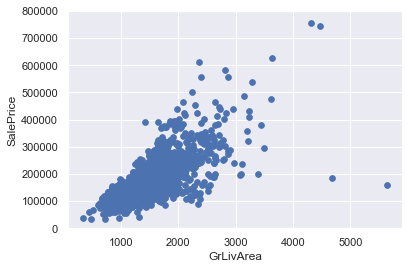

In [112]:
# first wo quickly view all the column names in the data
# print(df_train.columns)
# for above I could also use - data.columns
# Checking - 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000), s=32)

 Its generally expected that larger living area comes with higher price. This chart shows thats generally true. But there are some 2–3 “cheap” houses with large living area
Now lets explore the “TotalBsmtSF” column — Total square feet of the basement area.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


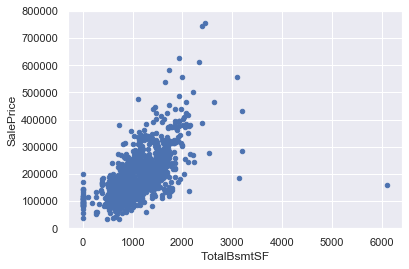

In [113]:
# Checking - 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

We can see that basement area indeed may have good predictive power for the model.

Now lets check “OverallQual” — overall material and finish quality. This one may be more subjective feature.

### Now list of variables that contain year information, because I will compare the difference between All years feature with SalePrice

In [114]:
year_feature = [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


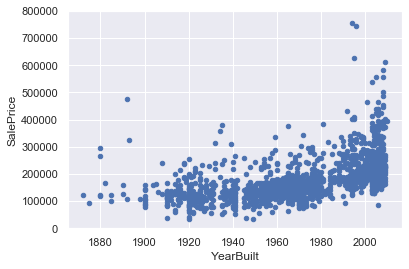

In [115]:
# Checking - 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
data.plot.scatter(x = 'YearBuilt', y = 'SalePrice', ylim=(0, 800000))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


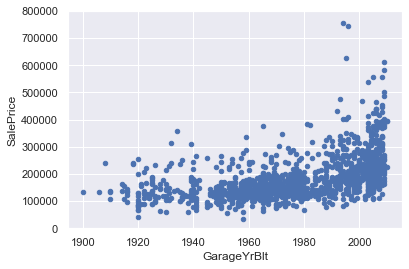

In [116]:
# Checking - 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train['GarageYrBlt']], axis=1)
data.plot.scatter(x = 'GarageYrBlt', y = 'SalePrice', ylim=(0, 800000))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


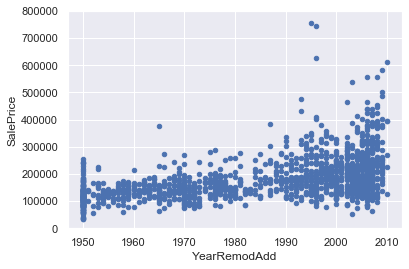

In [117]:
# Checking - 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train['YearRemodAdd']], axis=1)
data.plot.scatter(x = 'YearRemodAdd', y = 'SalePrice', ylim=(0, 800000))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


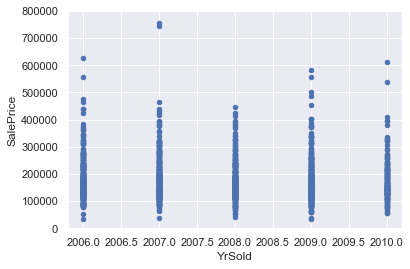

In [118]:
# Checking - 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train['YrSold']], axis=1)
data.plot.scatter(x = 'YrSold', y = 'SalePrice', ylim=(0, 800000))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


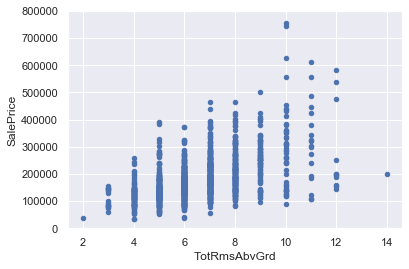

In [119]:
# Checking - TotRmsAbvGrd' i.e. total rooms above grade
data = pd.concat([df_train['SalePrice'], df_train['TotRmsAbvGrd']], axis=1)
data.plot.scatter(x = 'TotRmsAbvGrd', y = 'SalePrice', ylim=(0, 800000))


(-0.5, 9.5, 0, 800000)

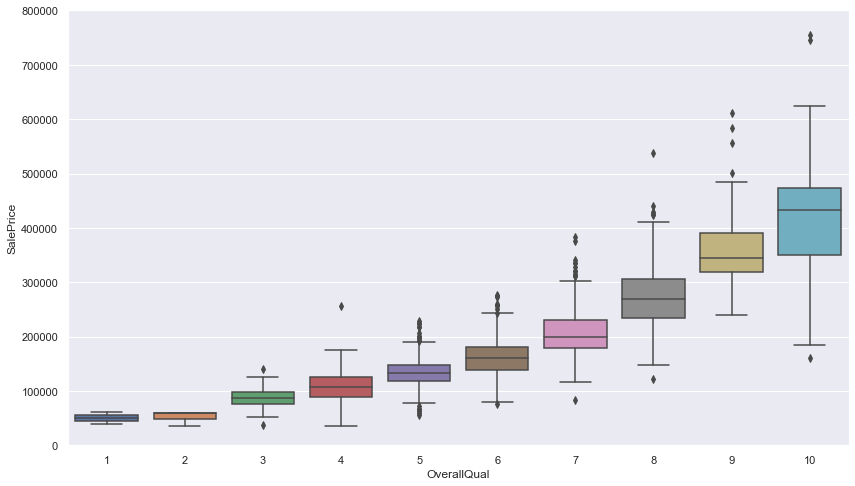

In [120]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin= 0, ymax=800000)

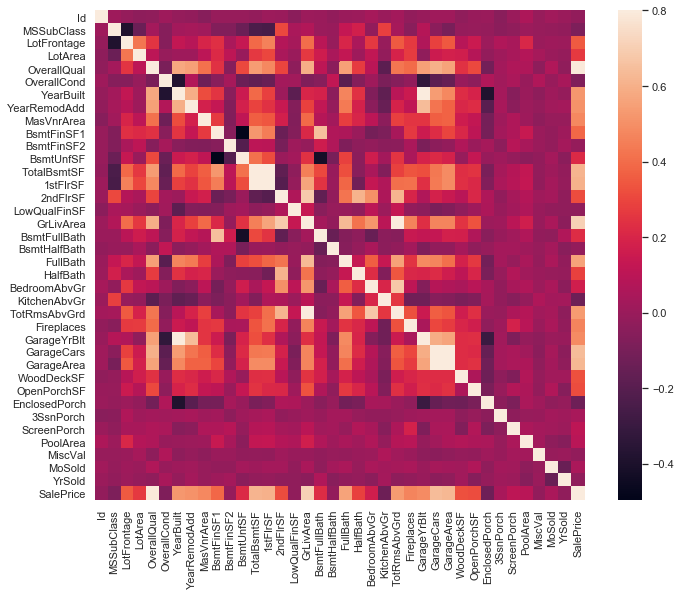

In [121]:

# Now lets view the top 8 correlated features with the sale price:
corr_mat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=0.8, square=True)

Now a simple Feature Engineering - of finding out the top-most correlated columns with SalesPrice. 
Later while in our Model will use only these top-most important features to predict SalePrices.

Feature Engineering - Find out the most correlated columns with SalesPrice and use only those columns in modelNow the big beautiful scatter plot with a hell of lot of visual data in a single plot

In [122]:
top_correlations = df_train.corr()
top_feature_columns = top_correlations['SalePrice'][top_correlations['SalePrice'].values > 0.2].index.values
top_feature_columns

array(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'], dtype=object)

And now another heatmap with ONLY the top 12 correlated features
And within the top 12 features I can see 'GarageYrBlt' included but, we know that this column has many empty fields. Hence I would like to fill them with zeros.

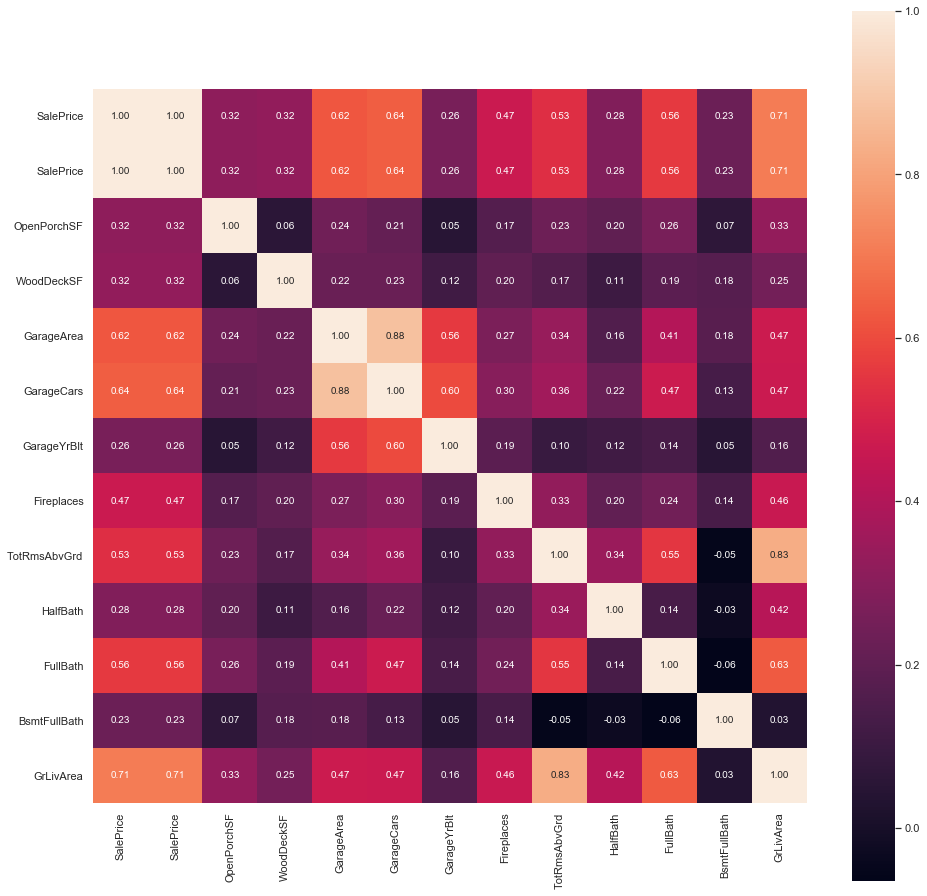

In [123]:
# Handling Missing Values for 19 features which have missing values mentioned above
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
# filling in missing GarageYrBuilt values with zeros.  
# But this may not be the most logical approach - refer to this discussion below for mor perspective
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/60143

# similary fillingup na valuse for couple of other features
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

heat_map_with_top_correlated_features = np.append(top_feature_columns[-12:], np.array(['SalePrice']))
pearson_correlation_coefficients = np.corrcoef(df_train[heat_map_with_top_correlated_features[::-1]].T)
plt.figure(figsize=(16,16))
sns.set(font_scale=1)
with sns.axes_style('white'):
    sns.heatmap(pearson_correlation_coefficients, yticklabels=heat_map_with_top_correlated_features[::-1], xticklabels=heat_map_with_top_correlated_features[::-1], fmt='.2f', annot_kws={'size': 10}, annot=True, square=True, cmap=None)
    
    

Now lets glance over the above heatmap to understand some points just visualy looking at the correlation number

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' have strong correlation with 'SalePrice'.

- While 'GarageCars' and 'GarageArea' also have strong correlation, but they are mostly mutually dependent i.e. they are NOT linearly independent of each other, i.e. there is a high-multicollinearity (0.88 as we can see in the figure) between them. Because, the number of cars that fit into the garage is dependent of the garage area. Hence, we just need one of these variables in our analysis (we can decide to keep 'GarageCars' as its correlation with 'SalePrice' is higher).
- Same mutual dependence applies to the two features 'TotalBsmtSF' and '1stFloor' . We will take only 'TotalBsmtSF' in our feature-engineering.
- AND ALSO 'TotRmsAbvGrd' and 'GrLivArea', and we will only take 'GrLivArea'

So from the below array of top correlated features lets make our selection

array(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'], dtype=object)

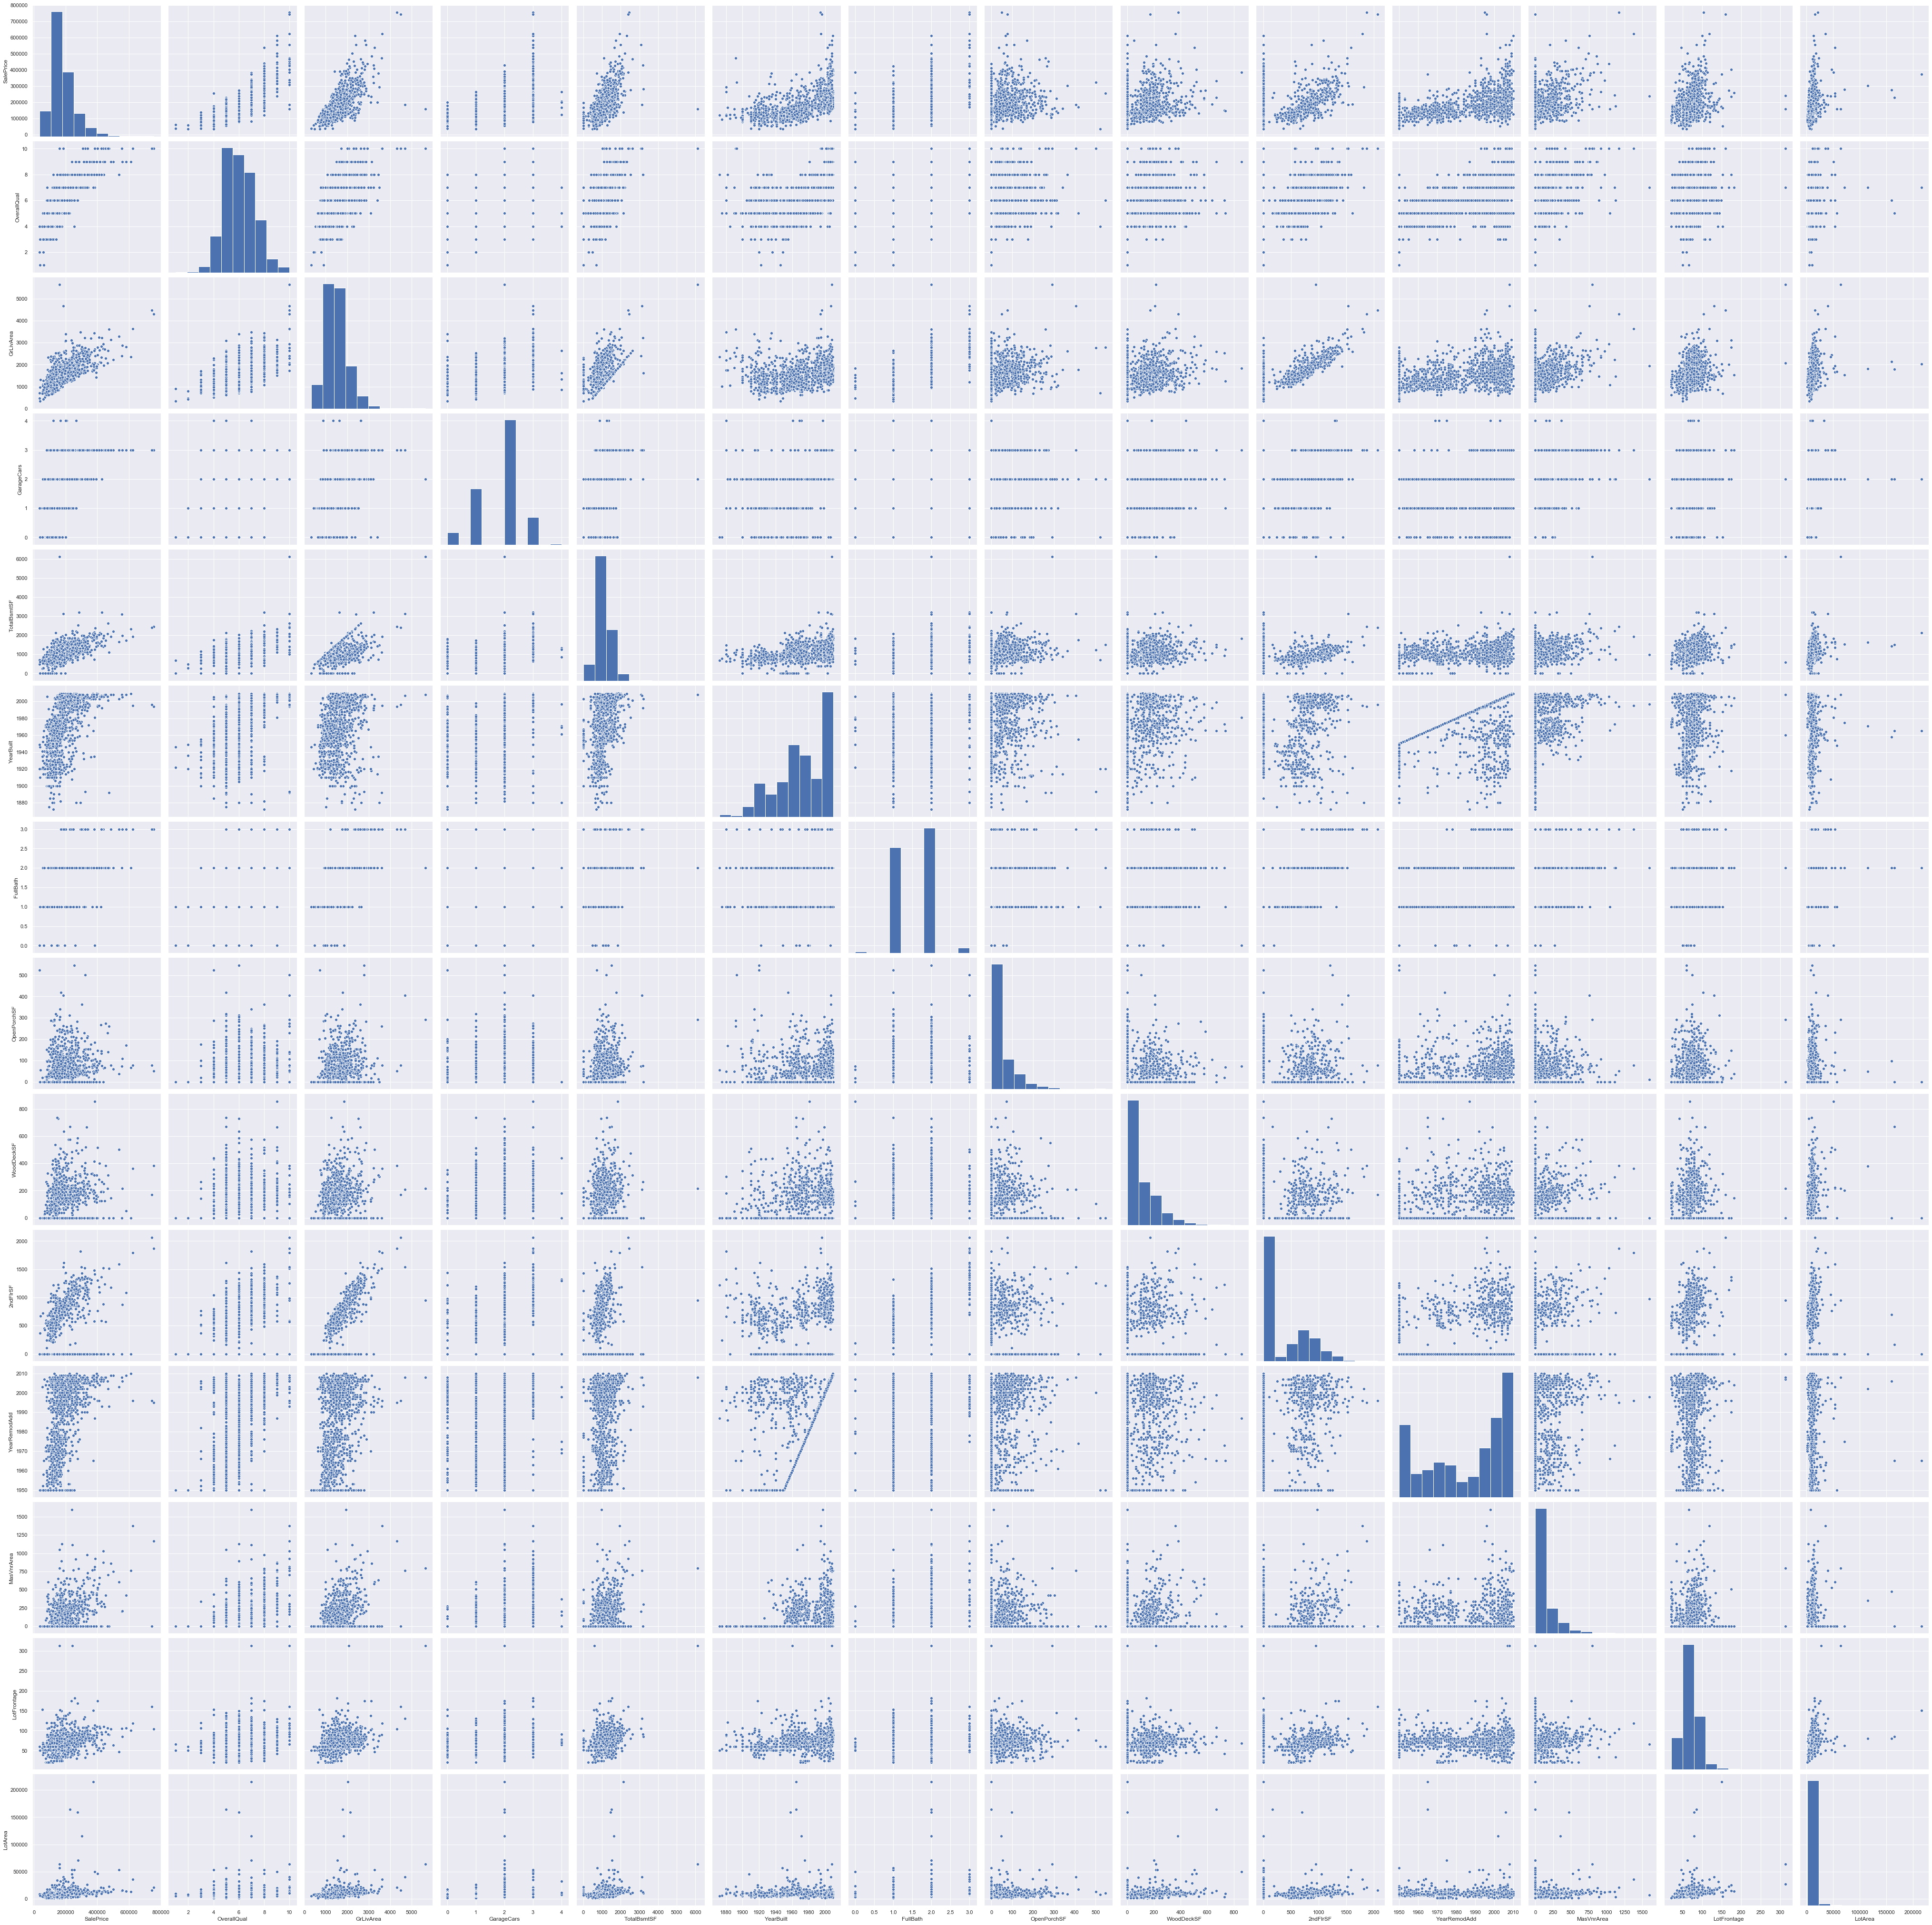

In [124]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'OpenPorchSF', 
        'WoodDeckSF', '2ndFlrSF', 'YearRemodAdd', 'MasVnrArea', 'LotFrontage', 'LotArea']
sns.pairplot(df_train[cols], height=4)
plt.show()

Checking out missing data

In [125]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
GarageType       81  0.055479
GarageCond       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrType        8  0.005479
Electrical        1  0.000685
YearRemodAdd      0  0.000000
RoofStyle         0  0.000000
RoofMatl          0  0.000000
ExterQual         0  0.000000

## Now the all important SalePrice prediction, Using Linear Regression

## Loss function

Given our Simple Linear Regression equation:

$$Y = bX + a$$

We can use the following cost function to find the coefficients:

### Mean Squared Error (MSE) Cost Function

The MSE is defined as:

$$MSE = J(W) =  \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - h_w(x^{(i)}))^2$$

where

$$h_w(x) = g(w^Tx)$$

### and Root Mean Squared Error

$$RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y^{(i)} - h_w(x^{(i))}))^{2}}$$

Mean Squared Error (MSE) is the workhorse of basic loss functions. For calculating MSE, I take the difference between my y value predictions and the ground truth, square it, and average it out across the whole dataset.

---

As per the book Hands-On Machine Learning with Scikit-Learn & TensorFlow the formula for the Batch Gradient Descent method is:

$ \dfrac{\partial}{\partial \theta_{j}} MSE(\theta)= \dfrac{2}{m}\sum_{i=1}^{m}(\theta^T \cdot \boldsymbol{x}^{(i)}-y^{(i)})\cdot x^{(i)}$

So that the gradient vector of the cost function is:

$\bigtriangledown_{\theta}MSE(\theta) = \begin{bmatrix} \dfrac{\partial}{\partial \theta_{0}} MSE(\theta_0) \\ \dfrac{\partial}{\partial \theta_{1}} MSE(\theta_1) \\ \dfrac{\partial}{\partial \theta_{2}} MSE(\theta_2) \\ \vdots \\ \dfrac{\partial}{\partial \theta_{n}} MSE(\theta_n) \end{bmatrix} = \dfrac{2}{m} \cdot X^T \cdot (X \cdot \theta - y)$

---

For Proof of Batch Gradient Descent's cost function gradient vector

The cost function is given by

$$J = \dfrac{1}{N}\sum_{n=1}^{N}\left[\boldsymbol{w}^T\boldsymbol{x}_n-y_n \right]^2.$$

Take the total derivative

$$dJ = \dfrac{1}{N}\sum_{n=1}^N\{2\left[\boldsymbol{w}^T\boldsymbol{x}_n-y_n \right]d\boldsymbol{w}^T\boldsymbol{x}_n \}.$$

As $d\boldsymbol{w}^T$ is not dependent on the summation index $n$ we can pull it out of the sum. We can put it in front of $ \left[\boldsymbol{w}^T\boldsymbol{x}_n-y_n \right]$ because it is a scalar. Hence we obtain

$$dJ = d\boldsymbol{w}^T\left[\dfrac{1}{N}\sum_{n=1}^N\{2\left[\boldsymbol{w}^T\boldsymbol{x}_n-y_n \right]\boldsymbol{x}_n \}\right].$$

Now, we know that the term in the bracket is the gradient of $J$ with respect to $\boldsymbol{w}$. Hence,

$$\text{grad}_{\boldsymbol{w}}J=\dfrac{1}{N}\sum_{n=1}^N\{2\left[\boldsymbol{w}^T\boldsymbol{x}_n-y_n \right]\boldsymbol{x}_n \}.$$


---
The explanation for gradient and total derivative relationship.

Let $J(\boldsymbol{w})=J(w_0,w_1,...,w_m)$ be a multivariate function. The total derivative of $J$ is given by

$$dJ = \dfrac{\partial J}{\partial w_0}dw_0+\dfrac{\partial J}{\partial w_1}dw_1+\ldots+\dfrac{\partial J}{\partial w_m}dw_m$$
$$=[dw_0, dw_1,\ldots, dw_m][\dfrac{\partial J}{\partial w_0},\dfrac{\partial J}{\partial w_1},\ldots,\dfrac{\partial J}{\partial w_m}]^T$$
$$=d\boldsymbol{w}^T\text{grad}_{\boldsymbol{w}}J.$$


In [126]:
def loss_func(y_predicted, y_actual):
    squared_error = (y_predicted - y_actual) ** 2
    sum_squared_error = squared_error.sum()
    size = len(y_actual)
    return 1/(2*size) * sum_squared_error

In [127]:
x = df_train['GrLivArea']
y = df_train['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x.shape

(1460, 2)

##### Now lets define our Hypothesis variable, meaning the one to be predicted, and here we are predicting 'Sale Price'. And also the independent variable. Lets say first I want to make the independent variable as 'GrLivArea' which represents, "Above grade (ground) living area square feet"

In [128]:
x = df_train['GrLivArea']
y = df_train['SalePrice']

 I will preprocess the data using the following formula for standardization

$x′=(x−μ) / σ$

The above formulae is called Z-score is one of the most popular methods to standardize data. It is equal to the original variable, minus its mean, divided by its standard deviation.
Once the standardization is done, all the features will have a mean of zero, a standard deviation of one, and thus, the same scale.
This process produces standard scores that represent the number of standard deviations above or below the mean that a specific observation falls. For instance, a standardized value of 2 indicates that the observation falls 2 standard deviations above the mean. This interpretation is true regardless of the type of variable that you standardize.

In [129]:
x = (x - x.mean()) / x.std()
print(x.shape)
# (1460, ) i.e. it will be an array like
# [0 1 2 3 4 5 6 7 8.... 1459]

x = np.c_[np.ones(x.shape[0]), x]
print(x.shape)
# (1460, 2)

(1460,)
(1460, 2)


In [130]:
# Now below I am defining a basic Linear regression function

class SimpleLinearRegression:

    def get_predictions(self, X):
        return np.dot(X, self._W)

    def _get_gradient_descent_step(self, X, targets, learning_rate):
        predictions = self.get_predictions(X)

        error = predictions - targets
        gradient = np.dot(X.T, error)/len(x)

        # now update the W
        self._W -= learning_rate * gradient


    def fit(self, X, y, iterations_num=1000, learning_rate=0.01):
            self._W = np.zeros(X.shape[1])

            self._history_of_cost = []
            self._w_history = [self._W]

            for i in range(iterations_num):
                predictions = self.get_predictions(X)
                cost = loss_func(predictions, y)

                self._history_of_cost.append(cost)

                self._get_gradient_descent_step(x, y, learning_rate)

                self._w_history.append(self._W.copy())

            return self


In [131]:
house_price_linear_result = SimpleLinearRegression()
house_price_linear_result.fit(x, y, iterations_num=2000, learning_rate=0.01)
print(house_price_linear_result._W)

[180921.19555322  56294.90199925]


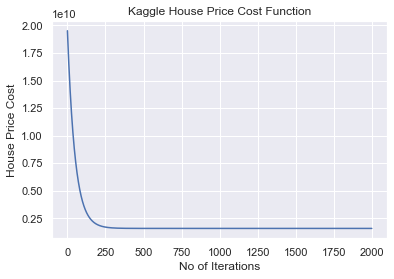

In [132]:
# Now plot the Cost function
plt.title('Kaggle House Price Cost Function')
plt.xlabel('No of Iterations')
plt.ylabel('House Price Cost')
plt.plot(house_price_linear_result._history_of_cost)
plt.show()


Now do the same implementation with a case for Multivariate Linear Regresstion.

From our earlier heat-map of Pearson Correlation we already know the top features that are correlated with 'SalePrice' which are

`['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'OpenPorchSF', 
        'WoodDeckSF', '2ndFlrSF', 'YearRemodAdd', 'MasVnrArea', 'LotFrontage', 'LotArea']`

In [133]:
# We have already taken care of NA values for some the below features
x = df_train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
'YearBuilt', 'FullBath', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'YearRemodAdd', 
              'MasVnrArea', 'LotFrontage', 'LotArea']]

# just like before let's standardize our independent variable data
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

house_price_multi_variate_linear_result = SimpleLinearRegression()
house_price_multi_variate_linear_result.fit(x, y, iterations_num = 2000, learning_rate=0.01)

print(house_price_multi_variate_linear_result._W)

[ 1.80921196e+05  7.72536266e+04  1.08454562e+03  2.07745324e+03
  1.40180565e+02 -4.95778419e+02  3.66954940e+02 -4.46204227e+02
 -1.81061812e+01  7.38062886e+01 -1.05645911e+03  1.30486249e+02
  9.71722069e+01 -1.28375674e+02  1.78862813e+02]


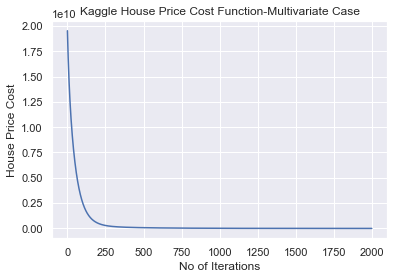

In [134]:
plt.title('Kaggle House Price Cost Function-Multivariate Case')
plt.xlabel('No of Iterations')
plt.ylabel('House Price Cost')
plt.plot(house_price_multi_variate_linear_result._history_of_cost)
plt.show()

Looks like our cost function is performing slightly better with Multivariate case.

Okay so that was our attempt at Multivariate Linear Regression and now we will implement the same with the Linear Regression function from `sklearn.linear_model`

#### Under Least Square method of Simple Linear Regression the target is finding those parameters α and β for which the error term is minimized. To be more precise, the model will minimize the squared errors: indeed, we do not want our positive errors to be compensated by the negative ones, since they are equally penalizing for our model.

![](https://i.imgur.com/lrnZh6v.png)

And it can be mathematically proved that the formulae for β is below 

![](https://i.imgur.com/0HY8itT.png)

And now the expression for alpha will be 

![](https://i.imgur.com/OvuSVsn.png)

## And we will use the famous LinearRegression() function of scikit-learn to implement this in a while.

First some data pre-procession.


In [135]:

train_target_label = df_train['SalePrice']
# labels are dependent variables whose values are to be predicted. 
top_feature_columns_modified = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'OpenPorchSF', 
        'WoodDeckSF', '2ndFlrSF', 'YearRemodAdd', 'MasVnrArea', 'LotFrontage', 'LotArea']

training_sample_df = df_train[top_feature_columns_modified]
test_sample_df = df_test[top_feature_columns_modified]

training_sample_df.head()

OverallQual  GrLivArea  GarageCars  ...  MasVnrArea  LotFrontage  LotArea
0            7       1710           2  ...       196.0         65.0     8450
1            6       1262           2  ...         0.0         80.0     9600
2            7       1786           2  ...       162.0         68.0    11250
3            7       1717           3  ...         0.0         60.0     9550
4            8       2198           3  ...       350.0         84.0    14260

[5 rows x 13 columns]

In [136]:
test_sample_df.head()

OverallQual  GrLivArea  GarageCars  ...  MasVnrArea  LotFrontage  LotArea
0            5        896         1.0  ...         0.0         80.0    11622
1            6       1329         1.0  ...       108.0         81.0    14267
2            5       1629         2.0  ...         0.0         74.0    13830
3            6       1604         2.0  ...        20.0         78.0     9978
4            8       1280         2.0  ...         0.0         43.0     5005

[5 rows x 13 columns]

Do some data pre-processing by replacing all null values with median
using scikit-learn's Imputer class.

The strategy parameter is optional and takes a string, (default="mean")

If "mean", then replace missing values using the mean along the axis.
If "median", then replace missing values using the median along the axis.
If "most_frequent", then replace missing using the most frequent value along the axis.

In [137]:
imputer = SimpleImputer(strategy = 'median')

# During fit() the imputer learns about the mean, median etc of the data,
# which is then applied to the missing values during transform().
imputer.fit(training_sample_df)
imputer.fit(test_sample_df)

# Note - sklearn.preprocessing.Imputer.fit_transform returns a new array, it doesn't alter the argument array.
training_sample_df = imputer.transform(training_sample_df)
test_sample_df = imputer.transform(test_sample_df)

Previously we standardized the data with manual plain-python implement
#### Now we will use sklearn function

In [138]:
scaler = StandardScaler()

# Again, during fit() the imputer learns about the mean, median etc of the data,
# which is then applied to the missing values during transform().
scaler.fit(training_sample_df)
scaler.fit(test_sample_df)

training_sample_df = scaler.transform(training_sample_df)
test_sample_df = scaler.transform(test_sample_df)

#### Split both the training and testing set for checking model accuracy

In [139]:
# Syntax of train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(training_sample_df, train_target_label, train_size = 0.8 )

X_train.shape

(1168, 13)

In [140]:
X_test.shape

(292, 13)

In [141]:
training_sample_df.shape

(1460, 13)

In [142]:
test_sample_df.shape

(1459, 13)

Now finally run a Linear Regression model. With Scikit-Learn it is extremely straight forward to implement linear regression models, as all you really need to do is import the LinearRegression class, instantiate it, and call the fit() method along with our training data. This is about as simple as it gets when using a machine learning library to train on your data.

In [143]:
model = LinearRegression()
# we have to fit this model to our data, in other words, we have to make it “learn” using our training data.
# The syntax of the fit function is just plain model.fit(X_train, Y_train)
model.fit(training_sample_df, train_target_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slop calculated by the linear regression algorithm for our dataset, execute the following code.

#### Significance of the Coefficient of X
For a single variable case, say e.g. a data set between 'Exam final Score of a student' and 'Hour Studied' - where the 'Hour Studied' is the independent Variable (i.e. X) . And say, for a single row of data (i.e a single data point from the whoel dataset) we find the coefficient of X to be 9.91. This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

In [144]:
print('Intercept is ', model.intercept_)

# For retrieving the slope (coefficient of x). This will be an array of values.
print("Slope i.e. coefficient of x is ", model.coef_)

Intercept is  177921.01851212673
Slope i.e. coefficient of x is  [28196.91947993 26349.76648831  9645.4413169   7658.2055073
  6637.47089276 -2965.55939821   768.02475758  4437.72171596
 -4227.6251946   6888.80707764  5992.62389513   579.10402749
  2935.94808718]


### A note on R-squared.

##### "R-squared" approach is shorthand for maximising the proportion of the variance in the dependent variable that is predicted from the model

Suppose that we have $n$ observations $(x_1,y_1),\ldots,(x_n,y_n)$ from a simple linear regression
$$
Y_i=\alpha+\beta x_i+\varepsilon_i,
$$
where $i=1,\ldots,n$. Let us denote $\hat y_i=\hat\alpha+\hat\beta x_i$ for $i=1,\ldots,n$, where $\hat\alpha$ and $\hat\beta$ are the ordinary least squares estimators of the parameters $\alpha$ and $\beta$. The coefficient of the determination $r^2$ is defined by
$$
r^2=\frac{\sum_{i=1}^n(\hat y_i-\bar y)^2}{\sum_{i=1}^n(y_i-\bar y)^2}.
$$

In another form


$$
R^2 = \frac{\sum ( \hat{y}_i - \bar{y})^2}{\sum(y_i - \bar{y})^2} = 1 - \frac{\sum(\hat{y}_i - y_i)^2}{\sum(y_i - \bar{y})^2} = 1-\frac{\sum(\hat{y}_i - y_i)^2/n}{\sum(y_i - \bar{y})^2/n} = 1-\frac{ \hat{\sigma}^2_{\epsilon}
 }{\hat{\sigma}^2_Y}.
$$


### The [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) defines the square() function as below

Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [145]:
# regression = model.fit(training_sample_df, train_target_label)
print("Regression score is", model.score(training_sample_df, train_target_label))
print('train_target_label is ', train_target_label)

Regression score is 0.7858973705366121
train_target_label is  0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


Now that my model is trained with the training data set, I can now start testing the model with the testing dataset to Predict Sales Price from Test data set.
The y_predict is a numpy array that contains all the predicted values for the input values in the X_test series.

The general syntax is for making predictions on the test data, I have to execute the following form of:

```python
regressor = LinearRegression()
y_predition_from_model = regressor.predict(X_test)
```

Now that my model is trained with the training data set, I can now start testing the model with the testing dataset to Predict Sales Price from Test data set.
The y_predict is a numpy array that contains all the predicted values for the input values in the X_test series.

In [146]:
y_predict = model.predict(X_test)

In [147]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Square Error is ', rmse)


Root Mean Square Error is  31492.056190948366


In [148]:
prediction_on_test_data = model.predict(test_sample_df)
# print("Regression score on test sample data is", model.score(test_sample_df, train_target_label ))
testID = df_test['Id']
predict_submission = pd.DataFrame()
predict_submission['ID'] = testID
predict_submission['SalePrice'] = prediction_on_test_data
predict_submission

ID      SalePrice
0     1461  108125.218262
1     1462  171809.395377
2     1463  172711.837537
3     1464  195073.734546
4     1465  209815.191496
...    ...            ...
1454  2915   68025.514633
1455  2916   80707.019360
1456  2917  174307.976512
1457  2918  114170.511870
1458  2919  240588.774556

[1459 rows x 2 columns]

### Now I will do Ridge Regression

#### Some notes on Ridge Regression and The Lasso

The difference between the two methods and that **ridge regression** shrinks the regression coefficients towards zero while the Lasso sets some of them to be zero and that's why it's in a way a subset selection procedure. 

Ridge regression uses a quadratic penalty, and this is very small for small coefficients, giving almost no regularisation benefit from further reduction, which is why it typically fails to force any of them fully to zero

LASSO uses an absolute value penalty, so reducing a small coefficient to zero can give the same regularisation benefit as reducing a large coefficient by a small amount, making the approach frequently reduce the number of variables actively used in the final model.

In Linear regression, we have $\textbf{$\theta$} = \textbf{$\left (X^TX\right )^{-1} X^T y$}$. 

In Ridge regression, we have 

$\textbf{$\theta$} = \textbf{$\left ( \lambda I+ X^TX\right )^{-1} X^T y$}$

Least squares, Lasso and Rigde regression minimize the following objective functions respectively:

$\min ||y - X \beta||_2^2 $

$\min ||y - X \beta||_2^2 + \lambda ||\beta||_1 $,

$\min ||y - X \beta||_2^2 + \lambda ||\beta||_2 $,

The objective function in ridge regression has two terms. The penalty term $\lambda \|\beta\|_2^2$ encourages the coefficients to be small. However, the main term $\|y - X \beta\|^2$ encourages the choice of coefficients to fit $y$ well. So there is a tension between these two competing goals of fitting $y$ well and keeping the coefficients small.

Given a metrix $X$ and a vector $\vec{y}$, ordinary least squares (OLS) regression tries to find $\vec{c}$ such that $\left\|  X \vec{c} - \vec{y} \right\|_2^2$ is minimal. (If we assume that $\left\| \vec{v}\right\|_2^2=\vec{v} \cdot \vec{v}$.)

Ridge regression tries to find $\vec{c}$ such that $\left\| X \vec{c} - \vec{y} \right\|_2^2 + \left\| \beta \vec{c} \right\|_2^2 $ is minimal.

In [149]:
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(training_sample_df, train_target_label)
y_predict_ridge = model_ridge.predict(X_test)
mse_linear_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge))
print('MSE of Linear Ridge is ', mse_linear_ridge)


MSE of Linear Ridge is  31493.085314875483


#### And now MSE Calculation for Lasso Regression

In [150]:
model_lasso = Lasso(alpha=33)
model_lasso.fit(training_sample_df, train_target_label)
y_predict_lasso = model_lasso.predict(X_test)
mse_linear_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_predict_lasso))
print('MSE of Lasso Regression is ', mse_linear_lasso)

MSE of Lasso Regression is  31497.98513565041


##### Now we will be using Random Forest, and some brief notes on Random Forrest

One big advantage of random forest is that it can be used for both classification and regression problems.  We can also deal with regression tasks by using the algorithm's regressor.  You can also deal with regression tasks by using the algorithm's regressor. 
##### We can even make trees more random by additionally using random thresholds for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

Random forest, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

The low correlation between models (trees) is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). 

One of the biggest problems in machine learning is overfitting, but most of the time this won’t happen thanks to the random forest classifier. If there are enough trees in the forest, the classifier won’t overfit the model.

The main limitation of random forest is that a large number of trees can make the algorithm too slow and ineffective for real-time predictions.

A great quality of the random forest algorithm is that it is very easy to measure the relative importance of each feature on the prediction. Sklearn provides a great tool for this that measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity across all trees in the forest. It computes this score automatically for each feature after training and scales the results so the sum of all importance is equal to one.


### Decision Tree Algorithm

- It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

- In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

- The decisions or the test are performed on the basis of features of the given dataset.

![](https://i.imgur.com/9bK9AF8.png)


Here is a good description from Wikipedia: '"In a decision tree each internal node represents a 'test' on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). A node that has no children is a leaf.'"


Further from [Widipedia Decision Tree Learning](https://en.wikipedia.org/wiki/Decision_tree_learning) - "A decision tree or a classification tree is a tree in which each internal (non-leaf) node is labeled with an input feature. The arcs coming from a node labeled with an input feature are labeled with each of the possible values of the target feature or the arc leads to a subordinate decision node on a different input feature. Each leaf of the tree is labeled with a class or a probability distribution over the classes, signifying that the data set has been classified by the tree into either a specific class, or into a particular probability distribution (which, if the decision tree is well-constructed, is skewed towards certain subsets of classes)."

#### Now some guidance on the depth of the trees? How to choose the reasonable ones ?

###### Deeper trees reduces the bias; more trees reduces the variance.

The most important hyper-parameter is how many features to test for each split. The more useless features there are, the more features you should try.

Generally,

- **Number of trees:** the bigger the better. One way to evaluate and know when to stop is to monitor our error rate while building your forest (or any other evaluation criteria you could use) and detect when it converges. Also, the number of test nodes in your trees is upper bounded by the number of objects, so if you have lots of variables and not so many training objects, larger forest will be highly recommended in order to increase the chances of evaluating all the descriptors at least once in your forest.

However, more trees also mean more computational cost and after a certain number of trees, the improvement is negligible. An article from Oshiro et al. (2012) pointed out that, based on their test with 29 data sets, after 128 of trees there is no significant improvement

- **Tree depth:** To control how deep your trees are we can limit the maximum depth, limit the number of nodes, limit the number of objects required to split, stop splitting if the split does not sufficiently improves the fit,...). Most of the time, it is recommended to **prune (limit the depth of) the trees** if we are dealing with noisy data. Finally, we can use our fully developed trees to compute performance of shorter trees as these are a "subset" of the fully developed ones.

standard random forest algorithm grow the full decision tree without pruning. A single decision tree do need pruning in order to overcome over-fitting issue. However, in random forest, this issue is eliminated by random selecting the variables and the **OOB(out of bag)** action.

Tree correlation means that 2 trees are correlated in terms of predictor variable on which split is made. In bagging, **OOB(out of bag)** means that on average,we are able to use only 2/3rd of our dataset for building our tree and rest 1/3rd are not used. So we are trying to make prediction from **OOB 1/3rd dataset**.

Running the example above, fits the random forest ensemble model on the entire dataset and is then used to make a prediction on a new row of data. Randomness is used in the construction of the model. This means that each time the algorithm is run on the same data, it will produce a slightly different model.

In general, when using machine learning algorithms that have a stochastic learning algorithm, it is good practice to evaluate them by averaging their performance across multiple runs or repeats of cross-validation. When fitting a final model, it may be desirable to either increase the number of trees until the variance of the model is reduced across repeated evaluations, or to fit multiple final models and average their predictions.